In [69]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [53]:
housing.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_bedrooms_new'}>,
        <Axes: title={'center': 'age_simil_35'}>,
        <Axes: title={'center': 'age_simil_16'}>]], dtype=object)

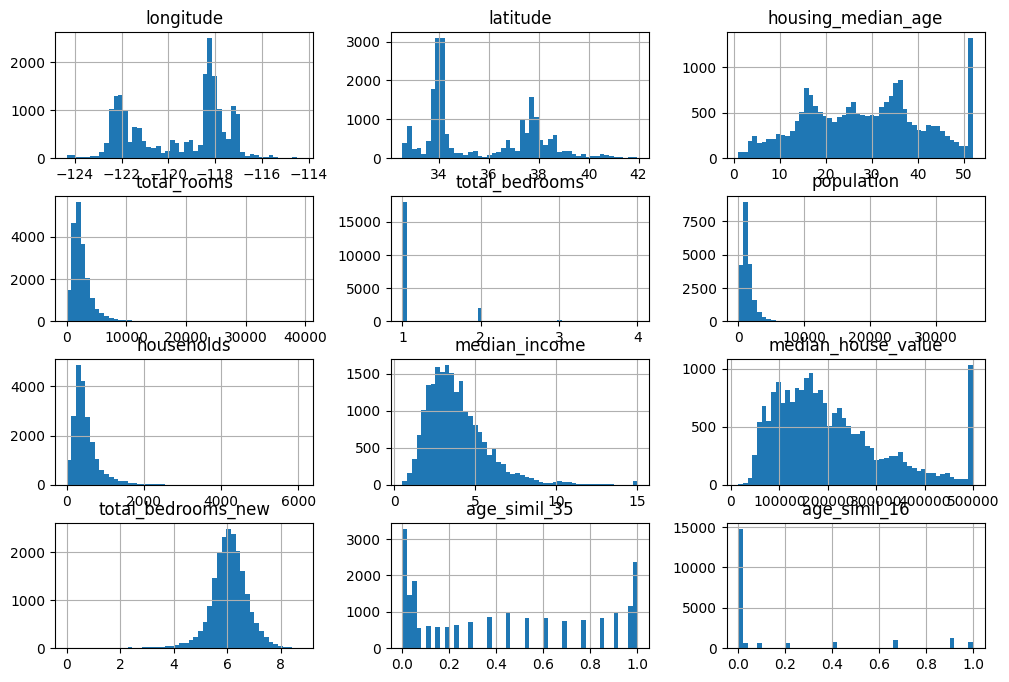

In [86]:
housing.hist(bins=50, figsize=(12, 8))

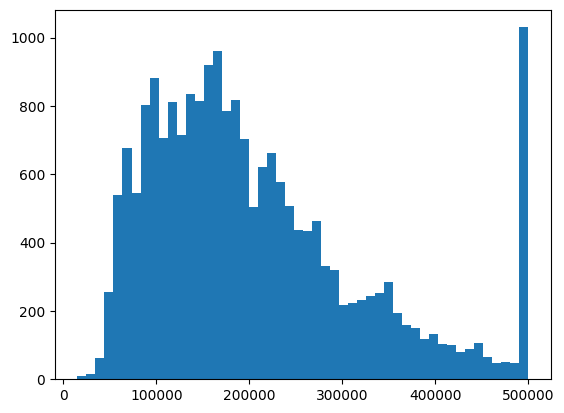

In [ ]:
import matplotlib.pyplot as plt
plt.hist(housing.median_house_value, bins=50)
plt.show()

In [48]:
#pdh=pd.cut(housing["total_bedrooms"], bins= [0, 900, 1800, 2700, np.inf] ,labels= [1,2,3,4])

In [54]:
#housing["total_bedrooms"] = pdh

In [71]:
pdh = np.log(housing.total_bedrooms)

In [72]:
housing["total_bedrooms_new"] = pdh

In [ ]:
#np.log(housing.total_rooms).hist()

In [ ]:
##housing["total_bedrooms"].dtype = "float64"

In [ ]:
arr=np.array(housing.total_bedrooms)
arr

array([1., 2., 1., ..., 1., 1., 1.])

In [ ]:
df=pd.DataFrame(arr)

In [ ]:
df

,0
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
20635,1.0
20636,1.0
20637,1.0
20638,1.0


In [ ]:
df.dtypes

0    float64
dtype: object

In [85]:
housing["total_bedrooms"]=df

In [74]:
from sklearn.metrics.pairwise import rbf_kernel

In [75]:
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma= 0.01)
age_simil_35

array([[0.69767633],
       [0.14085842],
       [0.05557621],
       ...,
       [0.0391639 ],
       [0.05557621],
       [0.02705185]])

In [76]:
age_simil_16 = rbf_kernel(housing[["housing_median_age"]], [[16]], gamma= 0.1)
age_simil_16

array([[7.18778174e-28],
       [8.20849986e-02],
       [5.19320116e-57],
       ...,
       [9.04837418e-01],
       [6.70320046e-01],
       [1.00000000e+00]])

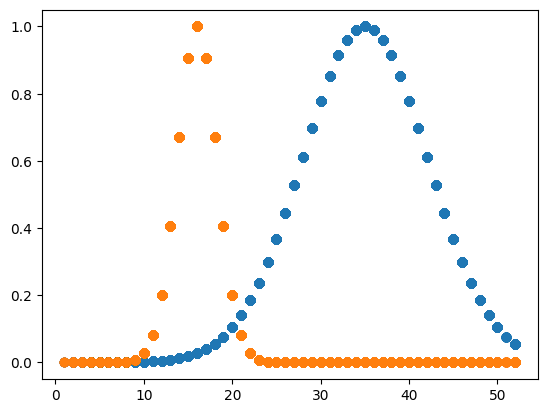

In [77]:
import matplotlib.pyplot as plt
plt.scatter(housing["housing_median_age"], age_simil_35)
plt.scatter(housing["housing_median_age"], age_simil_16)


In [82]:
housing["age_simil_35"] = age_simil_35

In [83]:
housing["age_simil_16"] = age_simil_16

In [84]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_new,age_simil_35,age_simil_16
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4.859812,0.697676,7.187782e-28
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,7.008505,0.140858,8.208500e-02
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.247024,0.055576,5.193201e-57
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.459586,0.055576,5.193201e-57
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.634790,0.055576,5.193201e-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.924256,0.367879,3.035391e-04
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,5.010635,0.055576,6.703200e-01
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,6.184149,0.039164,9.048374e-01
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,6.013715,0.055576,6.703200e-01


In [ ]:
pdh=pd

In [ ]:
housing = housing.drop("housing_median_age", axis=1)
housing

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_simil_35,age_simil_16
0,-122.23,37.88,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.697676,7.187782e-28
1,-122.22,37.86,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.140858,8.208500e-02
2,-122.24,37.85,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.055576,5.193201e-57
3,-122.25,37.85,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.055576,5.193201e-57
4,-122.25,37.85,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.055576,5.193201e-57
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.367879,3.035391e-04
20636,-121.21,39.49,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.055576,6.703200e-01
20637,-121.22,39.43,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.039164,9.048374e-01
20638,-121.32,39.43,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.055576,6.703200e-01


In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
std_slr = StandardScaler()

In [ ]:
arr=std_slr.fit_transform(housing_num)

In [ ]:
clm=std_slr.get_feature_names_out()

In [ ]:
pd.DataFrame(arr, columns= clm)["population"].std()

1.0000242256864986

In [ ]:
pd.DataFrame(arr, columns= clm).std()

longitude             1.000024
latitude              1.000024
total_rooms           1.000024
total_bedrooms        1.000024
population            1.000024
households            1.000024
median_income         1.000024
median_house_value    1.000024
age_simil_35          1.000024
age_simil_16          1.000024
dtype: float64

In [ ]:
#Min --> : v-mi/mx-mi

In [ ]:
min_max= MinMaxScaler()

In [ ]:
min_max.fit_transform(housing_num).sum()

nan

In [ ]:
a=np.array([1,2,3])

In [ ]:
a.sum()

6

In [ ]:
a.std()

0.816496580927726

In [ ]:
arr=np.log(housing["population"])

In [ ]:
df =pd.DataFrame(arr, columns= ["population"])
df

,population
0,5.774552
1,7.783641
2,6.206576
3,6.324359
4,6.336826
...,...
20635,6.739337
20636,5.874931
20637,6.914731
20638,6.608001


array([[<Axes: title={'center': 'population'}>]], dtype=object)

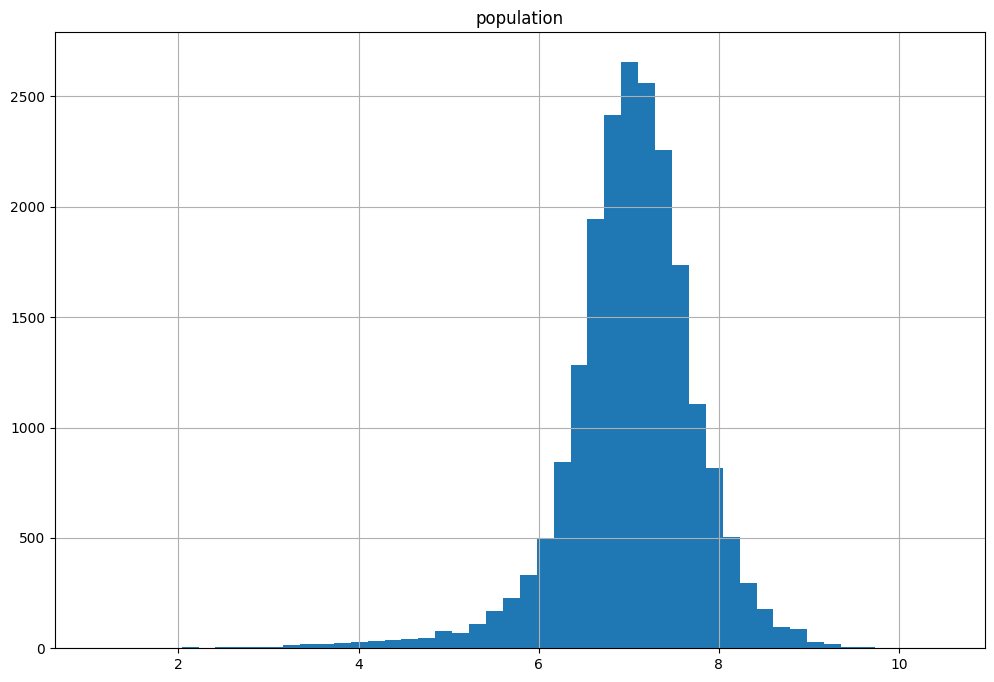

In [ ]:
df.hist(bins=50 , figsize=(12,8))

<Axes: >

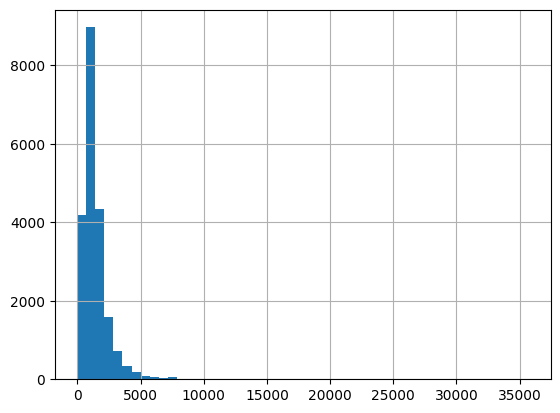

In [ ]:
housing["population"].hist(bins=50)

In [ ]:
arr=np.log(housing["total_bedrooms"])
arr

0        4.859812
1        7.008505
2        5.247024
3        5.459586
4        5.634790
           ...   
20635    5.924256
20636    5.010635
20637    6.184149
20638    6.013715
20639    6.423247
Name: total_bedrooms, Length: 20640, dtype: float64

<Axes: >

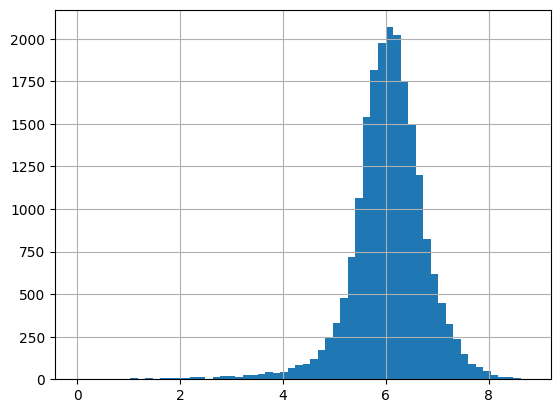

In [ ]:
arr.hist(bins=60)

In [ ]:
#plt.hist(housing.population, bins=50)
#plt.show()

In [ ]:
#plt.hist(log_population, bins=50)
#plt.show()

In [ ]:
#import numpy as np
#log_population = np.log(housing["population"])

In [ ]:
#def shuffle_and_split_data(data, test_ratio):
 #np.random.seed(42)
 #shuffled_indices = np.random.permutation(len(data))
 #test_set_size = int(len(data) * test_ratio)
 #test_indices = shuffled_indices[:test_set_size]
 #train_indices = shuffled_indices[test_set_size:]
 #return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#train_set, test_set = shuffle_and_split_data(housing, 0.2)
#len(train_set)

In [ ]:
#len(test_set)

In [ ]:
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
#test_set["income_cat"].value_counts() / len(test_set)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

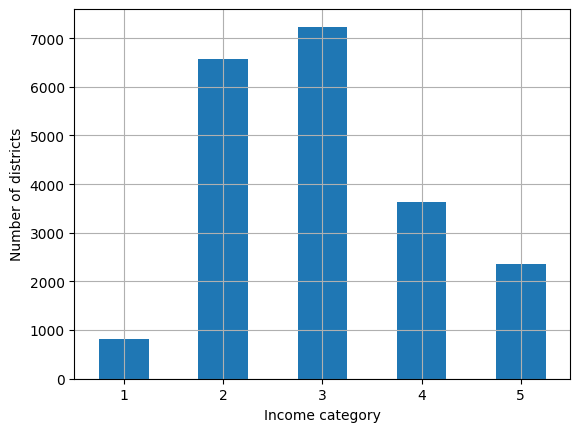

In [ ]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
        strat_train_set_n = housing.iloc[train_index]
        strat_test_set_n = housing.iloc[test_index]
        strat_splits.append([strat_train_set_n, strat_test_set_n])


In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<ipython-input-180-ba84e3d1e141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
<ipython-input-180-ba84e3d1e141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [ ]:
housing = strat_train_set.copy()

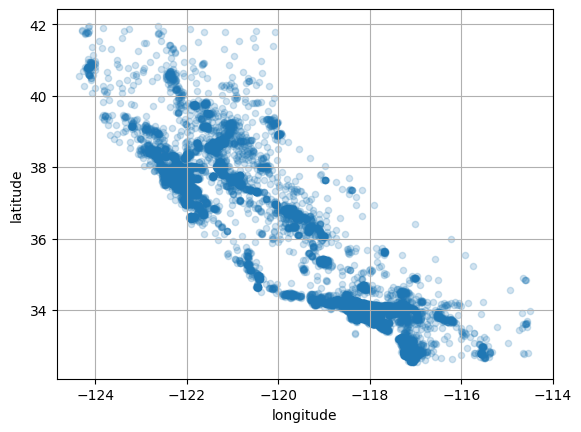

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

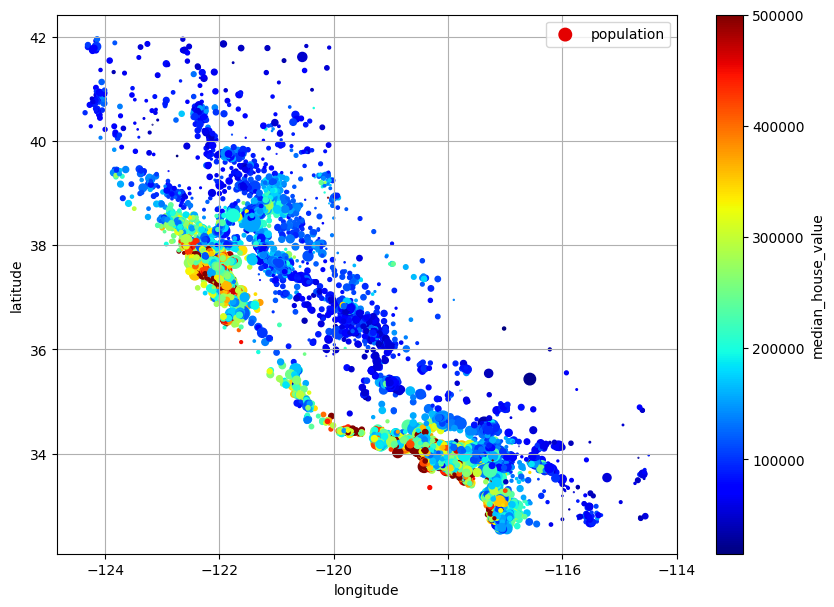

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

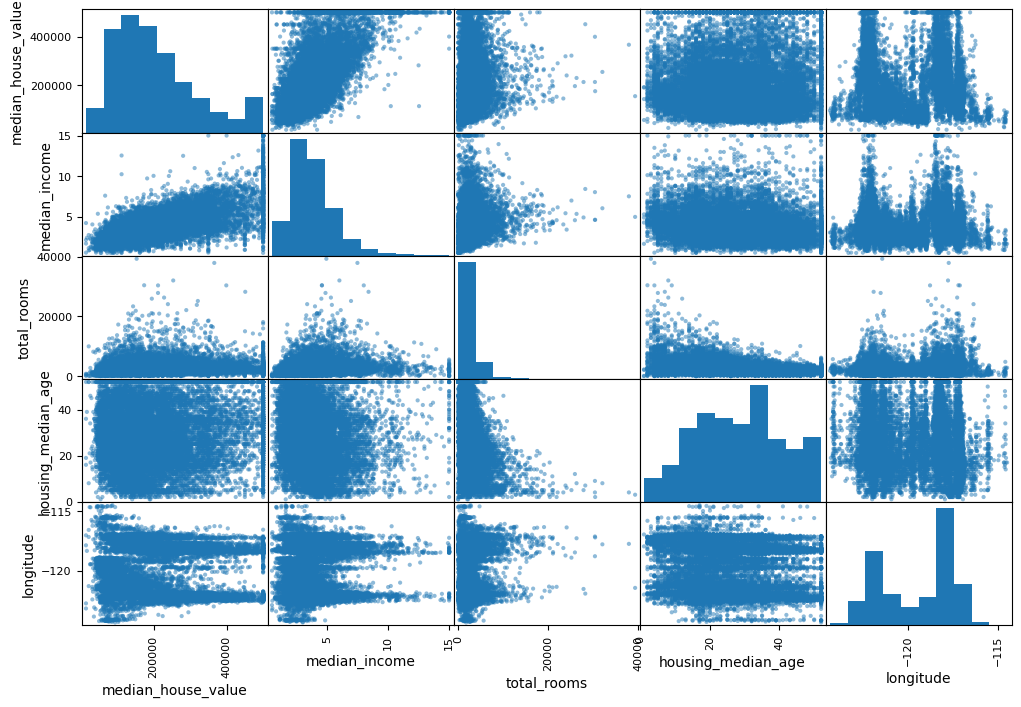

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", "longitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

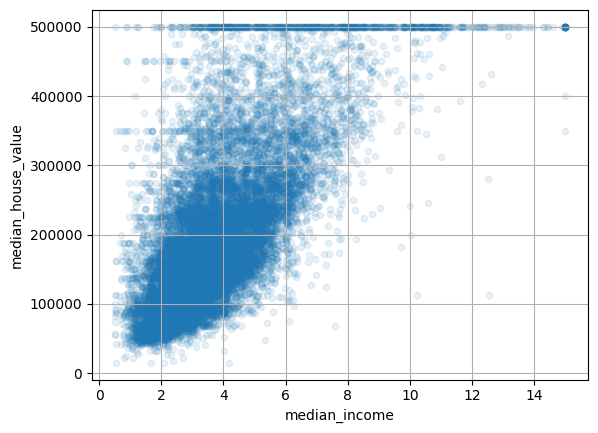

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
##housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [ ]:
  X = imputer.transform(housing_num)

In [ ]:
 housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                              index=housing_num.index)

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<16344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16344 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
#df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown), columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [ ]:
#from sklearn.linear_model import LinearRegression
#target_scaler = StandardScaler()
#scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
#model = LinearRegression()
#model.fit(housing[["median_income"]], scaled_labels)
#some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data
#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
#from sklearn.compose import TransformedTargetRegressor
 #   model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
  #  model.fit(housing[["median_income"]], housing_labels)
   # predictions = model.predict(some_new_data)


In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): # no *args or **kwargs!
        self.with_mean = with_mean
    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self!
    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean: # Added indentation here
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None): # Added indentation
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight) # Added indentation
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma) # Added indentation
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)] # Added indentation

In [ ]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight) # Call the fit method of KMeans
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
# Assuming 'housing_labels' is the variable causing the issue
# Check the shape of housing_labels and adjust it to match the data
housing_labels = housing_labels[:housing.shape[0]]  # Truncate or pad as needed

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)


In [ ]:
similarities[:3].round(2)

array([[0.  , 0.  , 0.97, 0.08, 0.12, 0.  , 0.  , 0.  , 0.  , 0.58],
       [0.  , 0.22, 0.  , 0.  , 0.  , 0.93, 0.  , 0.03, 0.87, 0.  ],
       [0.  , 0.  , 0.75, 0.45, 0.25, 0.  , 0.  , 0.  , 0.  , 0.28]])

In [ ]:
!pip install --upgrade scikit-learn
import sklearn
# Import set_config from the correct module for your scikit-learn version
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Restore the median function
import numpy as np
median = np.median

set_config(display="diagram")

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.36,  0.14,  1.4 , -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:
!pip install --upgrade scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'housing' is your DataFrame
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

 #Create the ColumnTransformer
preprocessing = ColumnTransformer([("num", make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), num_attribs),("cat", cat_pipeline, cat_attribs),])

# Apply the preprocessing to your data
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
  return ["ratio"] # feature names out
def ratio_pipeline():
  return make_pipeline(
            SimpleImputer(strategy="median"),
            FunctionTransformer(column_ratio, feature_names_out=ratio_name),
            StandardScaler())
log_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
preprocessing = ColumnTransformer(
            [("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
            ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
            ("people_per_house", ratio_pipeline(), ["population", "households"]),
            ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                                   "households", "median_income"]),
            ("geo", cluster_simil, ["latitude", "longitude"]),
            ("cat", cat_pipeline, make_column_selector(dtype_include=object)),]
                                  remainder=default_num_pipeline) # one column remaining: housing_median_age

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-232-5eeb651c0ada>, line 17)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

In [ ]:
preprocessing.get_feature_names_out()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = rounded to the nearest hundred

In [ ]:
housing_labels.iloc[:5].values